In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sacpy as scp
import sacpy.Map
import xarray as xr
import cartopy.feature as cft

In [18]:
lat = np.load("../data/htmp_data/lat1.npy")[:,0]
lon = np.load("../data/htmp_data/lon1.npy")[0,:]
heat = np.load("../data/htmp_data/1988lanina2.npy")
# heat[heat <=0] = 0
heat = np.abs(heat)
heat = heat / np.nanmax(heat)
# ssta = scp.get_anom(xr.open_dataset("../../DATA/HadISST_sst_2x2.nc")['sst'])

In [3]:
ssta = scp.get_anom(xr.open_dataset("../../DATA/HadISST_sst_2x2.nc")['sst'])


In [4]:
ip_data = np.load("../data/htmp_data/all_net_ip_data.npy")[8]
out_data = np.load("../data/htmp_data/all_net_out_data.npy")
lon1 = np.arange(0,360,5)
lat1 = np.arange(-55,61,5)
ssta11 = ip_data[:,:,:3].mean(axis=-1)
ssha11 = ip_data[:,:,3:].mean(axis=-1)

In [121]:
# plt.contour(ip_data[:,:,:3].mean(axis=-1))


In [5]:
ssh = xr.open_dataset("/mnt/e/CMIP5_ForM_noTauu/OBS/zos/Con_SSH.nc")['ssh']
ssha = scp.get_anom(ssh)

In [6]:
ssta1 = ssta.loc["1988-01":"1988-03",-55:53,6:360].mean(axis=0)
# ssha1 = ssha.loc["1988-01":"1988-03",-25:25,120:280].mean(axis=0)
ssha1 = ssha.loc["1988-01":"1988-03",-55:53,6:360].mean(axis=0)

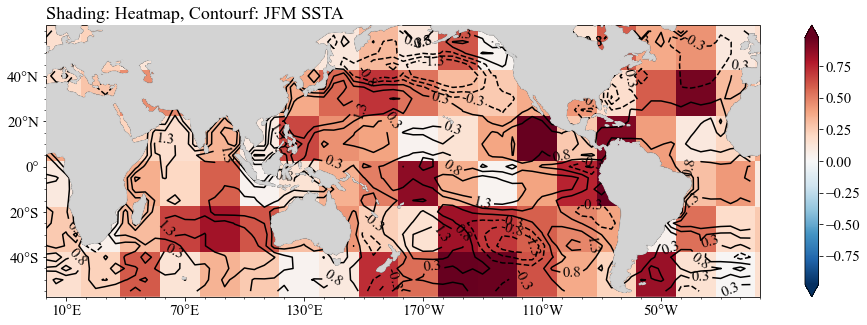

In [22]:
fig = plt.figure(figsize=[16,5])
plt.rc('font', family='Times New Roman',size=15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.spcolormesh(lon,lat,heat,shading='nearest')
# m1 = ax.scontour(ssta1.lon,ssta1.lat,ssta1,colors="k",levels=np.linspace(-1.3,1.3,6))
m1 = ax.scontour(lon1,lat1,ssta11,colors="k",levels=np.linspace(-1.3,1.3,6))
# m2 = ax.scontour(ssha1.lon,ssha1.lat,ssha1,colors="green",levels=np.linspace(-0.13,0.13,5))
ax.clabel(m1,fmt="%.1f")
# ax.clabel(m2,fmt="%.2f")
ax.init_map(smallx=10,stepx=60,stepy=20)
ax.add_feature(cft.LAND,color="lightgray",zorder=10)
ax.set_title("Shading: Heatmap, Contourf: JFM SSTA",loc="left")
plt.colorbar(m,extend="both")
plt.savefig("../pic/1988laninasstheatmap.png",dpi=300)

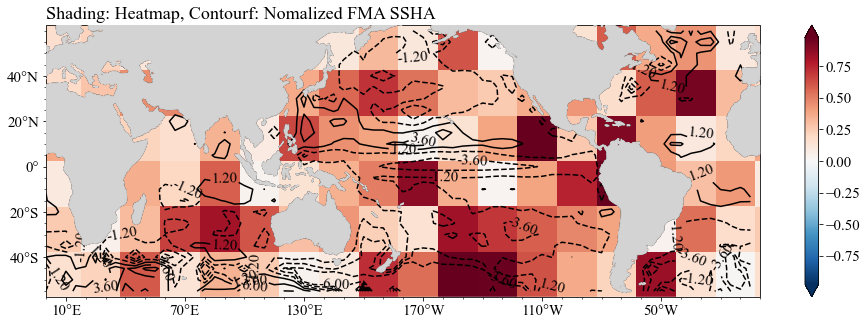

In [29]:
fig = plt.figure(figsize=[16,5])
plt.rc('font', family='Times New Roman',size=15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.spcolormesh(lon,lat,heat,shading='nearest')
# m1 = ax.scontour(ssta1.lon,ssta1.lat,ssta1,colors="k",levels=np.linspace(-1.3,1.3,6))
m1 = ax.scontour(lon1,lat1,ssha11,colors="k",levels=np.linspace(-6,6,6))
# ax.clabel(m1,fmt="%.1f")
ax.clabel(m1,fmt="%.2f")
ax.init_map(smallx=10,stepx=60,stepy=20)
ax.add_feature(cft.LAND,color="lightgray",zorder=10)
ax.set_title("Shading: Heatmap, Contourf: Nomalized FMA SSHA",loc="left")
plt.colorbar(m,extend="both")
plt.savefig("../pic/1988laninasshheatmap.png",dpi=300)

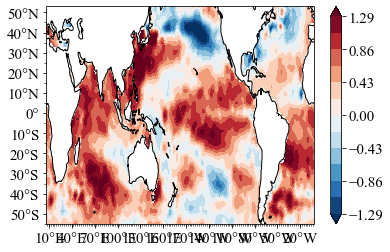

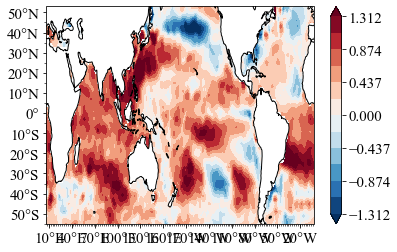

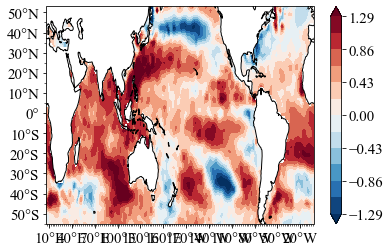

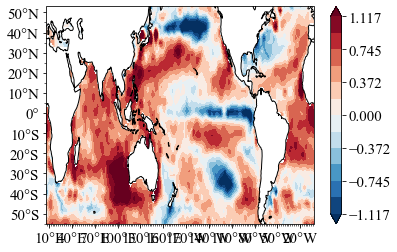

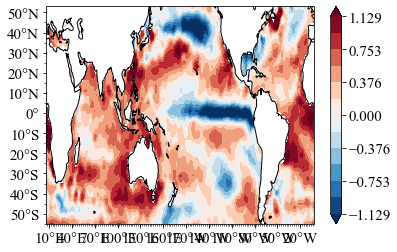

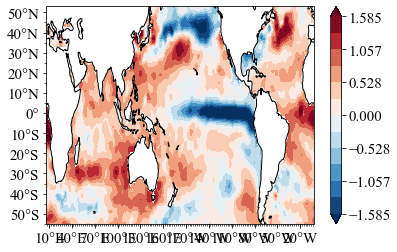

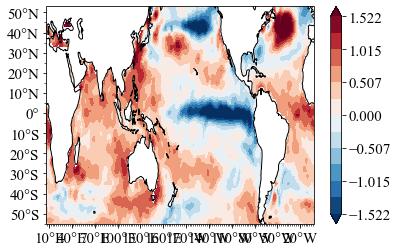

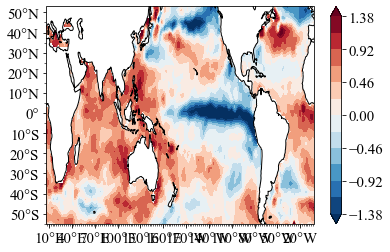

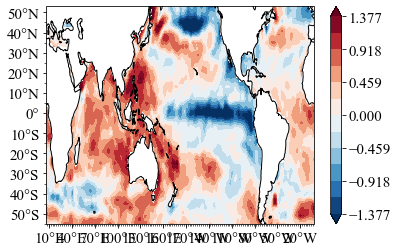

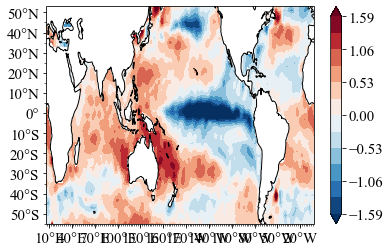

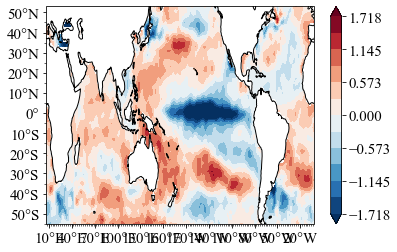

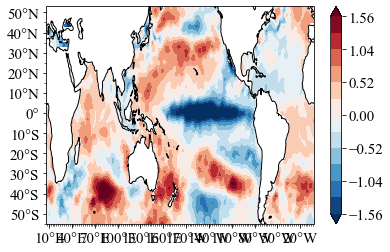

In [12]:
ssta3 = ssta.loc["1988-01":"1988-12",-55:53,6:360]
for i in range(12):
    ssta3[i].splot()
    plt.show()

In [51]:
ssta1.lat

<xarray.DataArray 'lat' (lat: 50)>
array([-47., -45., -43., -41., -39., -37., -35., -33., -31., -29., -27., -25.,
       -23., -21., -19., -17., -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,
         1.,   3.,   5.,   7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,
        25.,  27.,  29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,
        49.,  51.])
Coordinates:
  * lat      (lat) float64 -47.0 -45.0 -43.0 -41.0 -39.0 ... 45.0 47.0 49.0 51.0
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

(<cartopy.mpl.contour.GeoContourSet at 0x7febc1f7d370>, <GeoAxesSubplot:>)

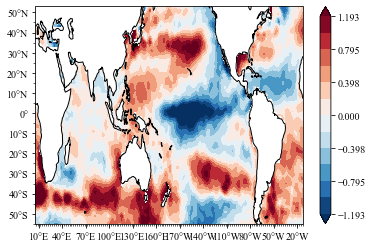

In [77]:
ssta1 = ssta.loc["1989-01":"1989-03",-55:53,6:348].mean(axis=0)
ssta1.splot()